In [11]:
import pandas as pd

titanic_data = pd.read_csv("train.csv")

unwanted_features = ['PassengerId','Name','Ticket','Cabin','SibSp','Parch','Embarked']
titanic_data = titanic_data.drop(unwanted_features,axis=1)
titanic_data = titanic_data.dropna()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])

features = ['Pclass','Sex','Age','Fare']
titanic_features = titanic_data[features]

titanic_features = pd.get_dummies(titanic_features,columns=['Pclass'])

titanic_target = titanic_data[['Survived']]

from sklearn.model_selection import train_test_split

X_train,x_test,Y_train,y_test = train_test_split(titanic_features,titanic_target,test_size=0.2,random_state=0)

import torch
import numpy as np

torch.set_default_tensor_type(torch.cuda.FloatTensor)
device = torch.device('cuda')

Xtrain_ = torch.from_numpy(X_train.values).float()
Xtest_ = torch.from_numpy(x_test.values).float()

Ytrain_ = torch.from_numpy(Y_train.values).view(1,-1)[0]
Ytest_ = torch.from_numpy(y_test.values).view(1,-1)[0]

Xtrain_ = Xtrain_.to(device=device, non_blocking=True)
Xtest_ = Xtest_.to(device=device, non_blocking=True)
Ytrain_ = Ytrain_.to(device=device,dtype=torch.long, non_blocking=True)
Ytest_ = Ytest_.to(device=device,dtype=torch.long, non_blocking=True)

print(Xtrain_.type())
print(Ytrain_.type())


import torch
import torch.nn as nn
import torch.nn.functional as F

input_size = 6
output_size = 2
hidden_size =10

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.fc3 = nn.Linear(hidden_size,output_size)

    def forward(self,x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=-1)

model=Net()
model.to('cuda')

import torch.optim as optim
optimizer = optim.Adam(model.parameters())
loss_fn=nn.NLLLoss()

epoch_data = []
epochs=1001

for epoch in range(1,epochs):
    optimizer.zero_grad()
    Ypred = model(Xtrain_)

    loss = loss_fn(Ypred,Ytrain_)
    loss.backward()

    optimizer.step()

    Ypred_test = model(Xtest_)
    loss_test = loss_fn(Ypred_test, Ytest_)

    _,pred = Ypred_test.data.max(1)

    accuracy = pred.eq(Ytest_.data).sum().item() / y_test.values.size
    epoch_data.append([epoch,loss.data.item(),loss_test.data.item(),accuracy])

    if epoch % 10 == 0:
        print('epoch - %d (%d%%) train loss - %.2f test loss - %.2f accuracy - %.4f' \
            %(epoch, epoch/150 *10 , loss.data.item(), loss_test.data.item(), accuracy))



torch.cuda.FloatTensor
torch.cuda.LongTensor
epoch - 10 (0%) train loss - 0.78 test loss - 0.75 accuracy - 0.4476
epoch - 20 (1%) train loss - 0.74 test loss - 0.73 accuracy - 0.4476
epoch - 30 (2%) train loss - 0.72 test loss - 0.71 accuracy - 0.4476
epoch - 40 (2%) train loss - 0.70 test loss - 0.70 accuracy - 0.3217
epoch - 50 (3%) train loss - 0.69 test loss - 0.70 accuracy - 0.5524
epoch - 60 (4%) train loss - 0.68 test loss - 0.69 accuracy - 0.5524
epoch - 70 (4%) train loss - 0.68 test loss - 0.69 accuracy - 0.5524
epoch - 80 (5%) train loss - 0.68 test loss - 0.69 accuracy - 0.5524
epoch - 90 (6%) train loss - 0.67 test loss - 0.69 accuracy - 0.5524
epoch - 100 (6%) train loss - 0.67 test loss - 0.69 accuracy - 0.5524
epoch - 110 (7%) train loss - 0.67 test loss - 0.69 accuracy - 0.5524
epoch - 120 (8%) train loss - 0.67 test loss - 0.69 accuracy - 0.5524
epoch - 130 (8%) train loss - 0.67 test loss - 0.69 accuracy - 0.5524
epoch - 140 (9%) train loss - 0.67 test loss - 0.69 ac

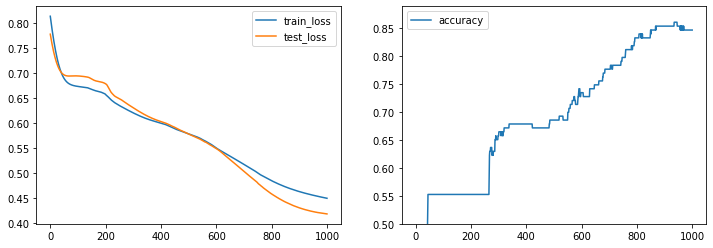

In [12]:


df_epochs_data = pd.DataFrame(epoch_data, columns=["epoch","train_loss","test_loss","accuracy"])
import matplotlib.pyplot as plt

f,(ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
df_epochs_data[["train_loss","test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)
plt.ylim(ymin=0.5)
plt.show()


In [23]:
print(Xtrain_[0])
print(Ytrain_[0])

model.eval

with torch.no_grad():
    input_to_test = Xtrain_[0]
    pred_out = model(input_to_test)
    print(pred_out)
    pred_indices = torch.max(pred_out, 0)
    print(pred_indices)



tensor([ 0., 36., 13.,  0.,  1.,  0.])
tensor(1)
tensor([-1.3493, -0.3003])
torch.return_types.max(
values=tensor(-0.3003),
indices=tensor(1))
